In [19]:
# Modules for Data Manipulation/Visualization
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [20]:
# Importing batting data and three year data 
batting = pd.read_csv("batting.csv")
batting_three = pd.read_csv("three_year_batting.csv")

In [21]:
batting_three.head()

,Name,Team,PA,AB,H,HR,R,RBI,SB,BB%,...,FB%,IFFB%,HR/FB,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,playerid
0,Mike Trout,LAA,1796,1422,443,101,316,251,76,18.5%,...,41.9%,7.3%,22.2%,21.7%,60.2%,38.1%,69.4%,89.4%,82.9%,10155
1,David Ortiz,BOS,626,537,169,38,79,127,2,12.8%,...,45.1%,7.3%,18.4%,29.1%,69.9%,44.4%,70.7%,90.5%,82.3%,745
2,J.D. Martinez,- - -,1655,1461,460,110,265,302,11,10.3%,...,37.3%,4.5%,27.4%,32.9%,76.7%,51.4%,55.6%,82.9%,72.8%,6184
3,Joey Votto,CIN,2007,1618,503,77,274,264,15,17.4%,...,33.1%,0.2%,17.5%,17.8%,69.6%,41.3%,77.3%,86.8%,84.5%,4314
4,Aaron Judge,NYY,1271,1039,284,83,215,191,15,16.7%,...,40.3%,5.4%,31.8%,25.5%,65.0%,41.1%,43.8%,79.9%,66.3%,15640


In [22]:
# Getting three year date for Given players
batting_three = batting.merge(batting_three, on = 'playerid', how = 'inner')
batting_three = batting_three.iloc[:,38:]

In [24]:
# Saving rookies to remove because they have no past data to use for difference calculations
rookie_list = [
    'Michael Chavis',
    'Pete Alonso', 
    'Fernando Tatis Jr.',
    'Mike Ford',
    'Eloy Jimenez',
    'Cole Tucker',
    'Dylan Moore',
    'Richie Martin Jr.']

rookie_batting = batting[batting['Name'].isin(rookie_list)]

In [25]:
# Removing rookies 
batting = batting[batting.Name.isin(rookie_list) == False]
batting.reset_index(inplace=True)

In [27]:
pct_batting = batting.iloc[:, 11:29]
pct_batting_three = batting_three.copy()

In [29]:
# Changing percentage stats from objects to floats 
for col in pct_batting.columns:
    if pct_batting[col].dtype == 'object':
        pct_batting[col] = pct_batting[col].str.rstrip('%')
        pct_batting[col] = pct_batting[col].astype('float64')

for col in pct_batting_three.columns:
    if pct_batting_three[col].dtype == 'object':
        pct_batting_three[col] = pct_batting_three[col].str.rstrip('%')
        pct_batting_three[col] = pct_batting_three[col].astype('float64')

In [31]:
# Calculate difference in stats 
df = pd.DataFrame()

i = 0
for i in range(18):
    df['Three_Year_{}_diff'.format(pct_batting_three.columns[i])] = pct_batting.iloc[:, i] - pct_batting_three.iloc[:, i]

df
    

,Three_Year_BB%_diff,Three_Year_K%_diff,Three_Year_ISO_diff,Three_Year_BABIP_diff,Three_Year_AVG_diff,Three_Year_OBP_diff,Three_Year_SLG_diff,Three_Year_LD%_diff,Three_Year_GB%_diff,Three_Year_FB%_diff,Three_Year_IFFB%_diff,Three_Year_HR/FB_diff,Three_Year_O-Swing%_diff,Three_Year_Z-Swing%_diff,Three_Year_Swing%_diff,Three_Year_O-Contact%_diff,Three_Year_Z-Contact%_diff,Three_Year_Contact%_diff
0,3.1,-13.8,0.201,0.092,0.168,0.161,0.368,15.1,-8.0,-7.2,-6.8,19.9,-5.3,-1.1,-4.0,21.5,10.9,14.9
1,5.1,-4.3,0.247,-0.035,0.051,0.078,0.299,-6.7,-11.2,18.1,7.6,17.0,2.8,8.1,2.5,-2.9,-0.5,-3.0
2,-2.1,-11.7,0.200,0.149,0.180,0.190,0.381,-9.4,16.9,-7.5,-12.8,16.2,0.8,9.9,2.8,-7.5,3.9,-2.0
3,-3.6,-4.4,0.218,0.125,0.161,0.107,0.380,1.5,-8.5,6.9,-10.6,16.8,8.2,-5.6,1.2,15.2,2.4,5.5
4,10.1,-6.4,0.305,0.062,0.113,0.156,0.417,-3.2,-16.1,19.3,0.3,15.3,2.1,-9.8,-3.2,9.1,-6.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,-0.1,6.7,-0.150,-0.082,-0.102,-0.106,-0.251,-10.6,12.7,-2.2,6.9,-14.6,0.9,2.5,1.4,-11.9,-4.5,-7.2
308,-2.0,5.6,-0.200,-0.051,-0.076,-0.092,-0.276,-8.0,3.7,4.3,-3.1,-25.6,0.8,-5.1,-2.6,-10.0,-4.9,-7.8
309,-0.2,18.4,-0.190,-0.091,-0.154,-0.144,-0.344,-5.7,-4.9,10.6,-1.8,-17.6,4.2,-11.9,-4.6,-25.6,-4.4,-15.3
310,-1.8,4.1,-0.116,-0.118,-0.129,-0.141,-0.245,-9.2,2.2,7.0,7.0,-9.2,-8.6,-1.4,-2.6,-6.5,-0.7,-0.5


In [32]:
# Combining dataframes
batting.drop('index', axis = 1, inplace = True)
batting = pd.concat([batting, df], axis = 1) 

batting

,playerid,Name,Team,MarApr_PA,MarApr_AB,MarApr_H,MarApr_HR,MarApr_R,MarApr_RBI,MarApr_SB,...,Three_Year_GB%_diff,Three_Year_FB%_diff,Three_Year_IFFB%_diff,Three_Year_HR/FB_diff,Three_Year_O-Swing%_diff,Three_Year_Z-Swing%_diff,Three_Year_Swing%_diff,Three_Year_O-Contact%_diff,Three_Year_Z-Contact%_diff,Three_Year_Contact%_diff
0,15998,Cody Bellinger,LAD,132,109,47,14,32,37,5,...,-8.0,-7.2,-6.8,19.9,-5.3,-1.1,-4.0,21.5,10.9,14.9
1,11477,Christian Yelich,MIL,124,102,36,14,26,34,6,...,-11.2,18.1,7.6,17.0,2.8,8.1,2.5,-2.9,-0.5,-3.0
2,17975,Scott Kingery,PHI,35,32,13,2,5,6,1,...,16.9,-7.5,-12.8,16.2,0.8,9.9,2.8,-7.5,3.9,-2.0
3,7927,Eric Sogard,TOR,49,43,17,3,8,9,2,...,-8.5,6.9,-10.6,16.8,8.2,-5.6,1.2,15.2,2.4,5.5
4,14130,Daniel Vogelbach,SEA,92,71,22,8,15,16,0,...,-16.1,19.3,0.3,15.3,2.1,-9.8,-3.2,9.1,-6.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,12984,Jackie Bradley Jr.,BOS,99,88,13,0,5,5,3,...,12.7,-2.2,6.9,-14.6,0.9,2.5,1.4,-11.9,-4.5,-7.2
308,9253,Keon Broxton,NYM,45,41,6,0,4,2,4,...,3.7,4.3,-3.1,-25.6,0.8,-5.1,-2.6,-10.0,-4.9,-7.8
309,16357,Pablo Reyes,PIT,39,36,5,0,5,3,0,...,-4.9,10.6,-1.8,-17.6,4.2,-11.9,-4.6,-25.6,-4.4,-15.3
310,6848,Eduardo Nunez,BOS,46,44,7,0,3,5,3,...,2.2,7.0,7.0,-9.2,-8.6,-1.4,-2.6,-6.5,-0.7,-0.5


In [33]:
# Adding Rookies Back 
i = 0
for i in range(18):
    rookie_batting['Three_Year_{}_diff'.format(pct_batting_three.columns[i])] = 0



In [34]:
# Adding rookies back to df 
batting = pd.concat([batting, rookie_batting])
batting

,playerid,Name,Team,MarApr_PA,MarApr_AB,MarApr_H,MarApr_HR,MarApr_R,MarApr_RBI,MarApr_SB,...,Three_Year_GB%_diff,Three_Year_FB%_diff,Three_Year_IFFB%_diff,Three_Year_HR/FB_diff,Three_Year_O-Swing%_diff,Three_Year_Z-Swing%_diff,Three_Year_Swing%_diff,Three_Year_O-Contact%_diff,Three_Year_Z-Contact%_diff,Three_Year_Contact%_diff
0,15998,Cody Bellinger,LAD,132,109,47,14,32,37,5,...,-8.0,-7.2,-6.8,19.9,-5.3,-1.1,-4.0,21.5,10.9,14.9
1,11477,Christian Yelich,MIL,124,102,36,14,26,34,6,...,-11.2,18.1,7.6,17.0,2.8,8.1,2.5,-2.9,-0.5,-3.0
2,17975,Scott Kingery,PHI,35,32,13,2,5,6,1,...,16.9,-7.5,-12.8,16.2,0.8,9.9,2.8,-7.5,3.9,-2.0
3,7927,Eric Sogard,TOR,49,43,17,3,8,9,2,...,-8.5,6.9,-10.6,16.8,8.2,-5.6,1.2,15.2,2.4,5.5
4,14130,Daniel Vogelbach,SEA,92,71,22,8,15,16,0,...,-16.1,19.3,0.3,15.3,2.1,-9.8,-3.2,9.1,-6.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,15585,Mike Ford,NYY,32,24,4,1,6,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228,17484,Eloy Jimenez,CHW,85,79,19,3,6,8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232,17326,Cole Tucker,PIT,38,36,9,1,4,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266,18042,Dylan Moore,SEA,39,35,7,1,4,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
batting.reset_index(inplace = True)
batting.drop('index', axis = 1, inplace=True)
batting

,playerid,Name,Team,MarApr_PA,MarApr_AB,MarApr_H,MarApr_HR,MarApr_R,MarApr_RBI,MarApr_SB,...,Three_Year_GB%_diff,Three_Year_FB%_diff,Three_Year_IFFB%_diff,Three_Year_HR/FB_diff,Three_Year_O-Swing%_diff,Three_Year_Z-Swing%_diff,Three_Year_Swing%_diff,Three_Year_O-Contact%_diff,Three_Year_Z-Contact%_diff,Three_Year_Contact%_diff
0,15998,Cody Bellinger,LAD,132,109,47,14,32,37,5,...,-8.0,-7.2,-6.8,19.9,-5.3,-1.1,-4.0,21.5,10.9,14.9
1,11477,Christian Yelich,MIL,124,102,36,14,26,34,6,...,-11.2,18.1,7.6,17.0,2.8,8.1,2.5,-2.9,-0.5,-3.0
2,17975,Scott Kingery,PHI,35,32,13,2,5,6,1,...,16.9,-7.5,-12.8,16.2,0.8,9.9,2.8,-7.5,3.9,-2.0
3,7927,Eric Sogard,TOR,49,43,17,3,8,9,2,...,-8.5,6.9,-10.6,16.8,8.2,-5.6,1.2,15.2,2.4,5.5
4,14130,Daniel Vogelbach,SEA,92,71,22,8,15,16,0,...,-16.1,19.3,0.3,15.3,2.1,-9.8,-3.2,9.1,-6.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,15585,Mike Ford,NYY,32,24,4,1,6,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316,17484,Eloy Jimenez,CHW,85,79,19,3,6,8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
317,17326,Cole Tucker,PIT,38,36,9,1,4,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318,18042,Dylan Moore,SEA,39,35,7,1,4,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Removing ID info From DataFrame 
ID = batting[['playerid', 'Name', 'Team']]
batting.drop(['playerid', 'Name', 'Team'], axis = 1, inplace = True)
batting.head()

,MarApr_PA,MarApr_AB,MarApr_H,MarApr_HR,MarApr_R,MarApr_RBI,MarApr_SB,MarApr_BB%,MarApr_K%,MarApr_ISO,...,Three_Year_GB%_diff,Three_Year_FB%_diff,Three_Year_IFFB%_diff,Three_Year_HR/FB_diff,Three_Year_O-Swing%_diff,Three_Year_Z-Swing%_diff,Three_Year_Swing%_diff,Three_Year_O-Contact%_diff,Three_Year_Z-Contact%_diff,Three_Year_Contact%_diff
0,132,109,47,14,32,37,5,14.4%,11.4%,0.459,...,-8.0,-7.2,-6.8,19.9,-5.3,-1.1,-4.0,21.5,10.9,14.9
1,124,102,36,14,26,34,6,16.1%,16.1%,0.451,...,-11.2,18.1,7.6,17.0,2.8,8.1,2.5,-2.9,-0.5,-3.0
2,35,32,13,2,5,6,1,2.9%,14.3%,0.313,...,16.9,-7.5,-12.8,16.2,0.8,9.9,2.8,-7.5,3.9,-2.0
3,49,43,17,3,8,9,2,10.2%,10.2%,0.302,...,-8.5,6.9,-10.6,16.8,8.2,-5.6,1.2,15.2,2.4,5.5
4,92,71,22,8,15,16,0,21.7%,21.7%,0.423,...,-16.1,19.3,0.3,15.3,2.1,-9.8,-3.2,9.1,-6.0,-2.0


In [37]:
# Changing percentage stats from objects to floats 
for col in batting.columns:
    if batting[col].dtype == 'object':
        batting[col] = batting[col].str.rstrip('%')
        batting[col] = batting[col].astype('float64')

In [84]:
# Checking for NA values
na_df = pd.DataFrame(batting.isna().sum()).reset_index()
na_df = na_df.rename(columns = {"index" : "FEATURE", 0 : 'NUM_MISSING'})


na_df = na_df[na_df['NUM_MISSING'] > 0]
na_df['PCT_MISSING'] = na_df['NUM_MISSING'] / len(batting.index) * 100 
na_df = na_df.sort_values('PCT_MISSING', ascending = False)

if len(na_df.PCT_MISSING) > 0: 
    na_df.head(100)
else: 
    print('No columns have missing values or NA values')

No columns have missing values or NA values


In [39]:
# Removing columns that indicate what occurred once a runner reached base 
batting.drop(['MarApr_SB', 'MarApr_R'], axis = 1, inplace = True) 
batting.head()

,MarApr_PA,MarApr_AB,MarApr_H,MarApr_HR,MarApr_RBI,MarApr_BB%,MarApr_K%,MarApr_ISO,MarApr_BABIP,MarApr_AVG,...,Three_Year_GB%_diff,Three_Year_FB%_diff,Three_Year_IFFB%_diff,Three_Year_HR/FB_diff,Three_Year_O-Swing%_diff,Three_Year_Z-Swing%_diff,Three_Year_Swing%_diff,Three_Year_O-Contact%_diff,Three_Year_Z-Contact%_diff,Three_Year_Contact%_diff
0,132,109,47,14,37,14.4,11.4,0.459,0.398,0.431,...,-8.0,-7.2,-6.8,19.9,-5.3,-1.1,-4.0,21.5,10.9,14.9
1,124,102,36,14,34,16.1,16.1,0.451,0.319,0.353,...,-11.2,18.1,7.6,17.0,2.8,8.1,2.5,-2.9,-0.5,-3.0
2,35,32,13,2,6,2.9,14.3,0.313,0.440,0.406,...,16.9,-7.5,-12.8,16.2,0.8,9.9,2.8,-7.5,3.9,-2.0
3,49,43,17,3,9,10.2,10.2,0.302,0.400,0.395,...,-8.5,6.9,-10.6,16.8,8.2,-5.6,1.2,15.2,2.4,5.5
4,92,71,22,8,16,21.7,21.7,0.423,0.318,0.310,...,-16.1,19.3,0.3,15.3,2.1,-9.8,-3.2,9.1,-6.0,-2.0


Text(0.5, 1.0, 'Correlation Heatmap')

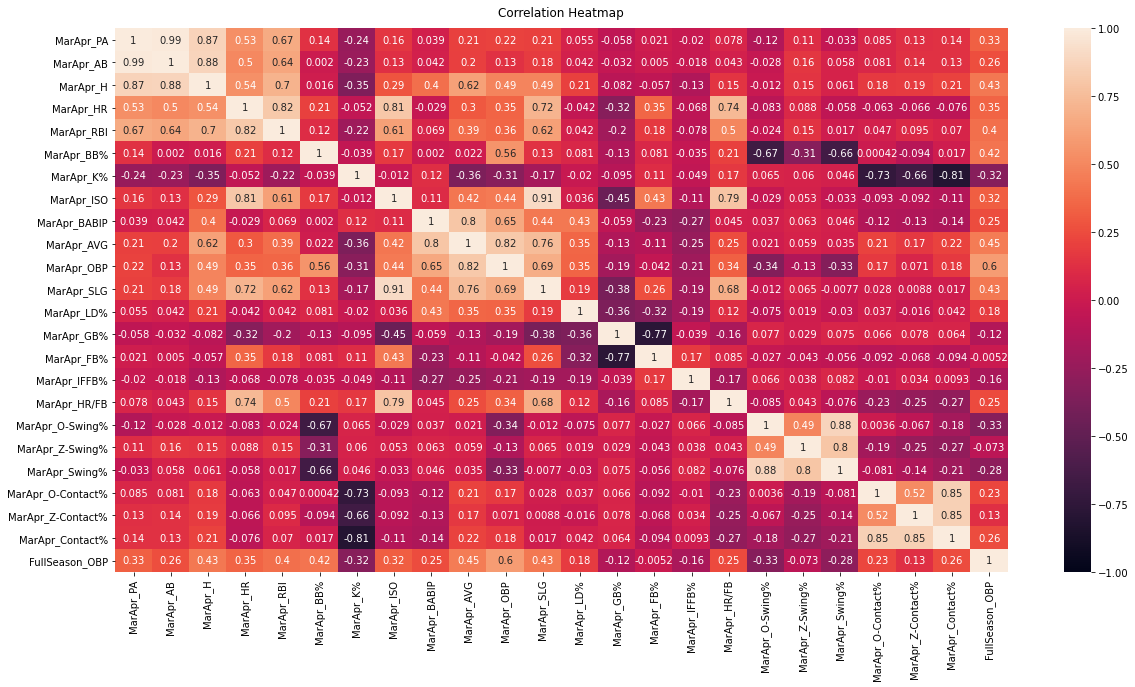

In [40]:
# Exploratory Data Analysis - Heat Map for Mar/Apr Performance
stats_corr = batting.iloc[:, :24].copy().corr()

plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(stats_corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Correlation Heatmap')

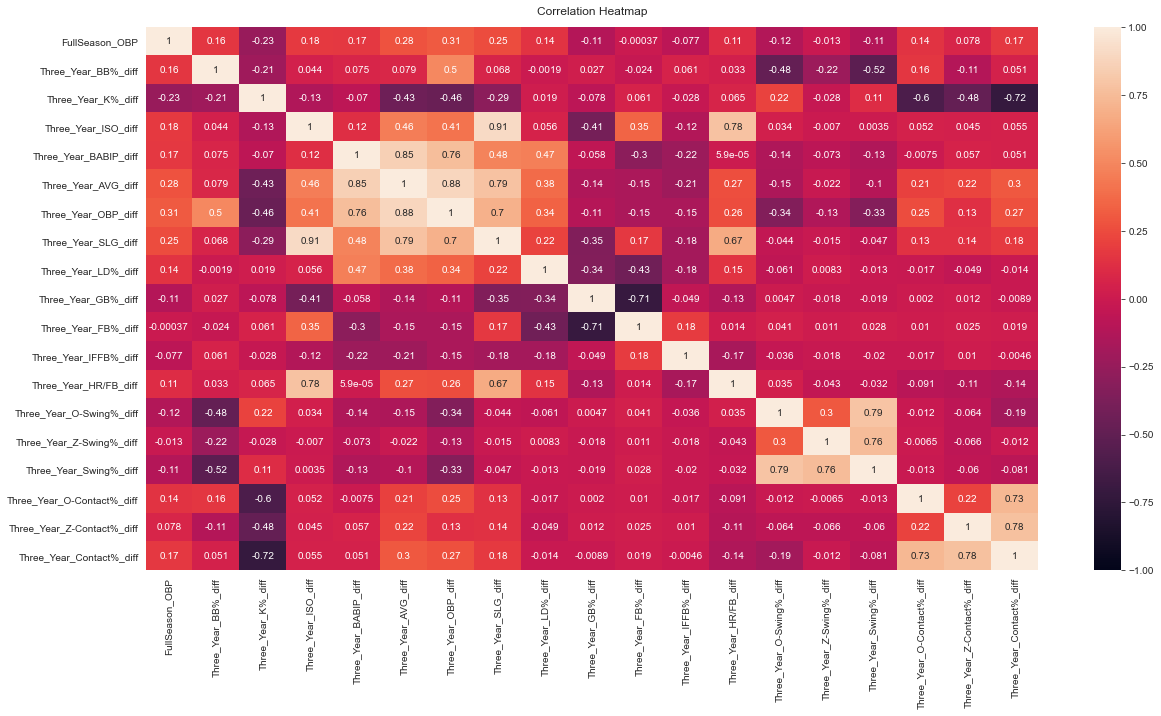

In [43]:
# Exploratory Data Analysis - Heat Maps for Three Year Diff 
stats_corr = batting.iloc[:, 23:].copy().corr()

plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(stats_corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

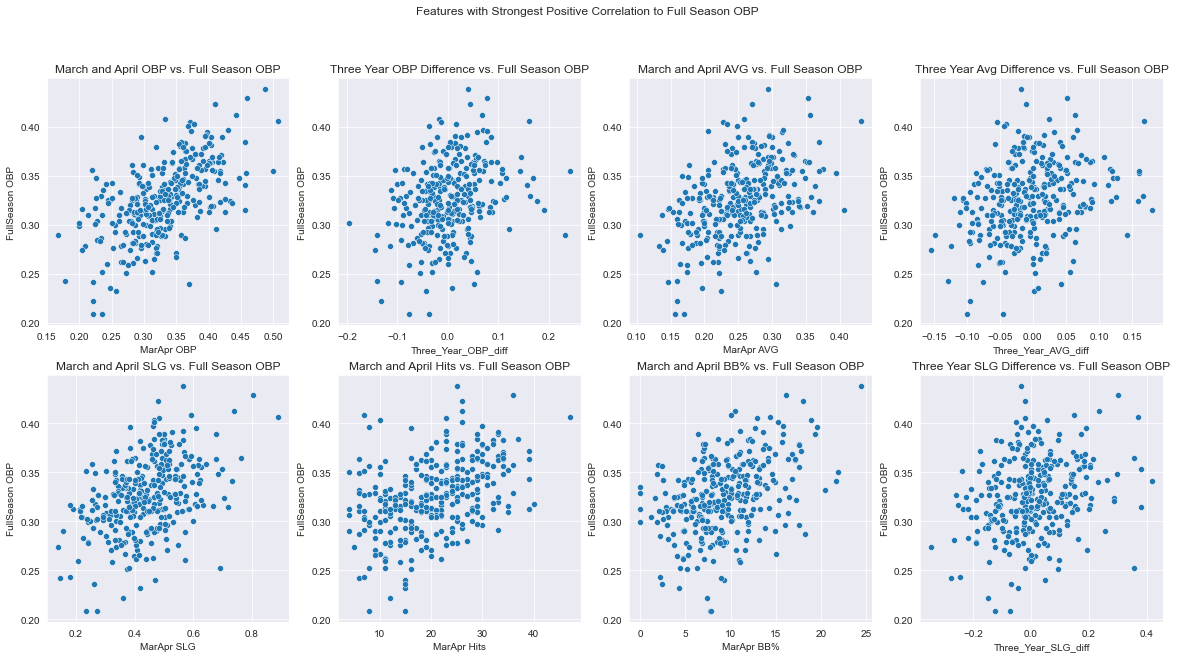

In [44]:
# Exploratory Data Analysis - Features with Strongest Correlation 
fig, axes = plt.subplots(2, 4, figsize=(20,10))
plt.suptitle('Features with Strongest Positive Correlation to Full Season OBP')
sns.set_style('darkgrid')

ax = sns.scatterplot(data = batting, x = 'MarApr_OBP', y = 'FullSeason_OBP', ax = axes[0,0])
_ = ax.set_title('March and April OBP vs. Full Season OBP')
_ = ax.set(xlabel = 'MarApr OBP', ylabel = 'FullSeason OBP')

ax1 = sns.scatterplot(data = batting, x = 'Three_Year_OBP_diff', y = 'FullSeason_OBP', ax = axes[0,1])
_ = ax1.set_title('Three Year OBP Difference vs. Full Season OBP')
_ = ax1.set(xlabel = 'Three_Year_OBP_diff', ylabel = 'FullSeason OBP')

ax2 = sns.scatterplot(data = batting, x = 'MarApr_AVG', y = 'FullSeason_OBP', ax = axes[0,2])
_ = ax2.set_title('March and April AVG vs. Full Season OBP')
_ = ax2.set(xlabel = 'MarApr AVG', ylabel = 'FullSeason OBP')

ax3 = sns.scatterplot(data = batting, x = 'MarApr_SLG', y = 'FullSeason_OBP', ax = axes[1,0])
_ = ax3.set_title('March and April SLG vs. Full Season OBP')
_ = ax3.set(xlabel = 'MarApr SLG', ylabel = 'FullSeason OBP')

ax4 = sns.scatterplot(data = batting, x = 'MarApr_H', y = 'FullSeason_OBP', ax = axes[1,1])
_ = ax4.set_title('March and April Hits vs. Full Season OBP')
_ = ax4.set(xlabel = 'MarApr Hits', ylabel = 'FullSeason OBP')

ax5 = sns.scatterplot(data = batting, x = 'MarApr_BB%', y = 'FullSeason_OBP', ax = axes[1,2])
_ = ax5.set_title('March and April BB% vs. Full Season OBP')
_ = ax5.set(xlabel = 'MarApr BB%', ylabel = 'FullSeason OBP')

ax6 = sns.scatterplot(data = batting, x = 'Three_Year_AVG_diff', y = 'FullSeason_OBP', ax = axes[0,3])
_ = ax6.set_title('Three Year Avg Difference vs. Full Season OBP')
_ = ax6.set(xlabel = 'Three_Year_AVG_diff', ylabel = 'FullSeason OBP')

ax7 = sns.scatterplot(data = batting, x = 'Three_Year_SLG_diff', y = 'FullSeason_OBP', ax = axes[1,3])
_ = ax7.set_title('Three Year SLG Difference vs. Full Season OBP')
_ = ax7.set(xlabel = 'Three_Year_SLG_diff', ylabel = 'FullSeason OBP')

C:\Users\kryan\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


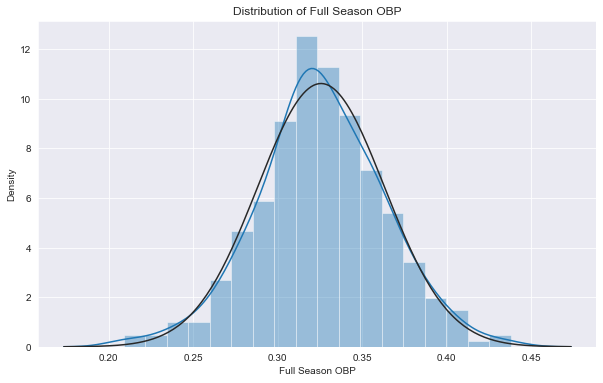

In [45]:
# Data Exploration - Target Variable
from scipy.stats import norm

plt.figure(figsize = (10,6))
ax = sns.distplot(batting['FullSeason_OBP'], fit = norm, kde = True)
_ = ax.set_title('Distribution of Full Season OBP')
_ = ax.set(xlabel = 'Full Season OBP')

# Target variable is normally distributed and doesn't need to be normalized

In [46]:
# Cross Validation for Model Selection 
# Models : Linear Regression, Decision Tree, Random Forest, and Xgboost 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Inputs and Target Variables
target = batting['FullSeason_OBP']
inputs = batting.drop(['FullSeason_OBP'], axis = 1)

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.8, random_state=0)

# Regressors 
LM = LinearRegression()
tree = tree.DecisionTreeRegressor()
RF = RandomForestRegressor()
XG = XGBRegressor()

clfs = [LM, tree, RF, XG]
names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
i =  0
for clf in clfs: 
    mean_cv_score = cross_val_score(clf, x_train, y_train, cv=10, scoring='neg_mean_absolute_error').mean()
    print(names[i], ":", mean_cv_score)
    i = i + 1

# XGBoost is the Best Model based on Neg MAE 

Linear Regression : -0.048640827191725536
Decision Tree : -0.03324523809523809
Random Forest : -0.023009595238095253
XGBoost : -0.021977433803535642


In [47]:
from sklearn.metrics import mean_absolute_error
XG.fit(x_train, y_train)
pred = XG.predict(x_test)
mean_absolute_error(y_test, pred)

0.025132595029659567

In [52]:
# Hyper paramter turing
from sklearn.model_selection import GridSearchCV
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(x_train,y_train)

    return gsearch.best_params_


# https://www.kaggle.com/felipefiorini/xgboost-hyper-parameter-tuning

In [53]:
hyperParameterTuning(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.5min finished


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 3,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [54]:
XGB = XGBRegressor(objective = 'reg:squarederror',
                    max_depth = 10, 
                    min_child_weight = 3, 
                    n_estimators = 500,
                    subsample = 0.7,                
                    colsample_bytree = 0.7,
                    learning_rate = 0.1)

XGB.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
preds = XGB.predict(x_test)
mean_absolute_error(y_test, preds)

0.02449233485851437

In [78]:
# Feature importance 
feature_importance = XGB.get_booster().get_score(importance_type='weight')
feature_importance_vars = list(feature_importance.keys())
feature_importance_vars
feature_importance_values = list(feature_importance.values())

feature_importance_df = pd.DataFrame(columns= ['Variable', 'Importance'])
feature_importance_df['Variable'] = feature_importance_vars
feature_importance_df['Importance'] = feature_importance_values

feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)
df = feature_importance_df[:20].reset_index().drop('index', axis = 1)
df

,Variable,Importance
0,MarApr_Z-Contact%,54
1,Three_Year_O-Swing%_diff,53
2,MarApr_BB%,48
3,MarApr_PA,46
4,Three_Year_BB%_diff,45
5,MarApr_K%,44
6,Three_Year_BABIP_diff,41
7,Three_Year_FB%_diff,37
8,MarApr_BABIP,35
9,MarApr_OBP,34


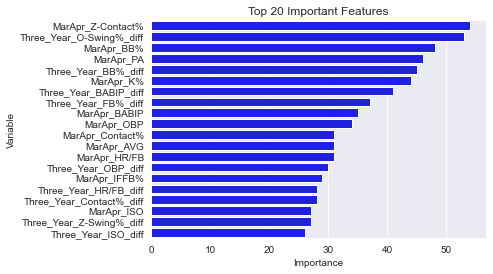

In [83]:
# Plotting Feature Importance 
ax = sns.barplot(x='Importance', y='Variable', data=df, color = 'blue')
_ = ax.set_title('Top 20 Important Features')

In [99]:
# Predicting for whole dataset 
x = batting.copy()
OBP_preds = XGB.predict(x)


320

In [114]:
# Attaching to ID and Name 
ID = ID[ID.Name.isin(rookie_list) == False]

In [116]:
# Attaching to ID and Name 
ID.drop(['level_0', 'index'], axis = 1, inplace = True)

,playerid,Name,Team
0,15998,Cody Bellinger,LAD
1,11477,Christian Yelich,MIL
2,17975,Scott Kingery,PHI
3,7927,Eric Sogard,TOR
4,14130,Daniel Vogelbach,SEA
...,...,...,...
307,12984,Jackie Bradley Jr.,BOS
308,9253,Keon Broxton,NYM
309,16357,Pablo Reyes,PIT
310,6848,Eduardo Nunez,BOS


In [118]:
# Putting rookie in the correct order 
rookie_ID = rookie_batting[['playerid', 'Name', 'Team']]
rookie_ID.reset_index(inplace=True)

In [123]:
ID = pd.concat([ID, rookie_ID])

In [126]:
ID.drop('index', axis = 1, inplace=True)

In [127]:
ID['Projected OBP'] = OBP_preds


,playerid,Name,Team,Projected OBP
0,15998,Cody Bellinger,LAD,0.385313
1,11477,Christian Yelich,MIL,0.370931
2,17975,Scott Kingery,PHI,0.342135
3,7927,Eric Sogard,TOR,0.362705
4,14130,Daniel Vogelbach,SEA,0.381210
...,...,...,...,...
3,15585,Mike Ford,NYY,0.361677
4,17484,Eloy Jimenez,CHW,0.311000
5,17326,Cole Tucker,PIT,0.312496
6,18042,Dylan Moore,SEA,0.301802


In [ ]:
# Printing results to CSV 
ID.to_csv('OBP_Predictions.csv')